# Training data cleaning

- Each excel file is for a department
- Doc numbers and names are the same in all departments
- Learner roles are different per department
- There are more doc nummbers in IT

## Import

In [24]:
import os
import sys
import subprocess
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

clean_data_path = os.path.join(parent_dir, "Data", "Clean_data", "Biotheus", "Training_Nantong")

## Load data

Annual training plan
Needs to be added for all employees!

In [25]:
path = os.path.join(clean_data_path, "Annual_Training_Plan.xlsx")
Annual_Training_Plan = pd.read_excel(path)

Annual_Training_Plan

,Planned training date,Training topic,Training position,Training duration (h),Trainer,Training frequency (month)
0,Q1,培训管理规程,全体员工,2,刘冬梅,6
1,Q1,批记录管理规程,全体员工,2,王睿,12
2,Q1,变更管理规程,全体员工,2,刘冬梅,6
3,Q1,数据完整性及良好文件记录要求,全体员工,2,龚豪杰刘冬梅,3
4,Q2,GMP基础知识 药品管理法及生物制药重点条款（合规性条款）,全体员工,2,刘冬梅庞敏,12
5,Q2,数据完整性,全体员工,2,龚豪杰,3
6,Q2,系统确认流程,全体员工,2,王瑞,12
7,Q2,偏差及纠正预防措施管理规程,全体员工,2,刘冬梅,6
8,Q2,污染控制策略,全体员工,2,龚豪杰,6
9,Q3,验证与确认在 GMP 中的应用,全体员工,2,周名扬,12


DP Training Matrix

In [26]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
DP = pd.read_excel(os.path.join(path, "DP Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
DP.columns=['doc number', 'doc name', 'DP总监', 'DP经理', 'DP主管', '配液及清洗灭菌', '洗烘瓶', '灌装', '轧盖', '目检', '包装']
DP = DP.replace('√', 1).replace(np.nan, 0).replace('—', 0)
DP = DP[DP['doc number'] != 0]
DP = DP[DP['doc number'] != np.nan]
DP = DP.iloc[0:377]
print(DP.shape)
DP_col_number = DP.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
DP_row_number = DP.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], DP_col_number + 2)), columns=DP.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to DP
DP = pd.concat([DP, temp_table], ignore_index=True)

DP_col_number = DP.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
DP_row_number = DP.shape[0]  # Get number of rows == number of documents

DP.to_excel(os.path.join(clean_data_path, "DP.xlsx"), index=False)
DP

(377, 11)


/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/3688073024.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DP = DP.replace('√', 1).replace(np.nan, 0).replace('—', 0)


,doc number,doc name,DP总监,DP经理,DP主管,配液及清洗灭菌,洗烘瓶,灌装,轧盖,目检,包装
0,BN-QM-SMP001,质量文件管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,BN-QM-SMP002,质量文件编号管理规程,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BN-QM-SMP003,良好书写实践管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,BN-QM-SMP004,GMP培训管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,BN-QM-SMP005,记录管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
392,0,污染控制策略,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
393,0,无菌验证管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
394,0,数据完整性,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
395,0,偏差及纠正预防措施管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


DS Training Matrix

In [27]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
DS = pd.read_excel(os.path.join(path, "DS Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
DS.columns=['doc number', 'doc name', 'DS高级经理', '细胞培养工程师', '细胞培养助理工程师', '细胞培养技术员', '细胞培养实习生', '纯化主管', '纯化工程师', '纯化助理工程师', '纯化技术员', '纯化\n实习生']
DS = DS.replace('√', 1).replace(np.nan, 0).replace('—', 0)
DS = DS[DS['doc number'] != 0]
DS = DS[DS['doc number'] != np.nan]
DS = DS.iloc[:377]
print(DS.shape)

DS_col_number = DS.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
DS_row_number = DS.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], DS_col_number + 2)), columns=DS.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to DS
DS = pd.concat([DS, temp_table], ignore_index=True)

DS_col_number = DS.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
DS_row_number = DS.shape[0]  # Get number of rows == number of documents
DS.to_excel(os.path.join(clean_data_path, "DS.xlsx"), index=False)
DS

(377, 12)


/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/4148002649.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DS = DS.replace('√', 1).replace(np.nan, 0).replace('—', 0)


,doc number,doc name,DS高级经理,细胞培养工程师,细胞培养助理工程师,细胞培养技术员,细胞培养实习生,纯化主管,纯化工程师,纯化助理工程师,纯化技术员,纯化\n实习生
0,BN-QM-SMP001,质量文件管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,BN-QM-SMP002,质量文件编号管理规程,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BN-QM-SMP003,良好书写实践管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,BN-QM-SMP004,GMP培训管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,BN-QM-SMP005,记录管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,污染控制策略,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
393,0,无菌验证管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
394,0,数据完整性,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
395,0,偏差及纠正预防措施管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


EHS培训矩阵

In [28]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
EHS = pd.read_excel(os.path.join(path, "EHS培训矩阵.xlsx"), sheet_name="Sheet1", header=2)
EHS.columns=['doc number', 'doc name', 'EHS经理', 'EHS主管', 'EHS工程师']
EHS = EHS.replace('√', 1).replace(np.nan, 0).replace('—', 0)
EHS = EHS[EHS['doc number'] != 0]
EHS = EHS[EHS['doc number'] != np.nan]
EHS = EHS.iloc[:377]
print(EHS.shape)

EHS_col_number = EHS.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
EHS_row_number = EHS.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], EHS_col_number + 2)), columns=EHS.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to EHS
EHS = pd.concat([EHS, temp_table], ignore_index=True)

EHS_col_number = EHS.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
EHS_row_number = EHS.shape[0]  # Get number of rows == number of documents
EHS.to_excel(os.path.join(clean_data_path, "EHS.xlsx"), index=False)
EHS

(377, 5)


/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/2791291619.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  EHS = EHS.replace('√', 1).replace(np.nan, 0).replace('—', 0)


,doc number,doc name,EHS经理,EHS主管,EHS工程师
0,BN-QM-SMP001,质量文件管理规程,1.0,1.0,1.0
1,BN-QM-SMP002,质量文件编号管理规程,0.0,0.0,0.0
2,BN-QM-SMP003,良好书写实践管理规程,1.0,1.0,1.0
3,BN-QM-SMP004,GMP培训管理规程,1.0,1.0,1.0
4,BN-QM-SMP005,记录管理规程,1.0,1.0,1.0
...,...,...,...,...,...
392,0,污染控制策略,1.0,1.0,1.0
393,0,无菌验证管理规程,1.0,1.0,1.0
394,0,数据完整性,1.0,1.0,1.0
395,0,偏差及纠正预防措施管理规程,1.0,1.0,1.0


IT Training Matrix

In [29]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
IT = pd.read_excel(os.path.join(path, "IT Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
IT.columns=['doc number', 'doc name', 'IT总监', 'IT经理', 'IT副经理', 'IT工程师', 'IT助理工程师']
IT = IT.replace('√', 1).replace(np.nan, 0).replace('—', 0)
IT = IT[IT['doc number'] != 0]
IT = IT[IT['doc number'] != np.nan]
IT = IT.iloc[:400]
print(IT.shape)

IT_col_number = IT.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
IT_row_number = IT.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], IT_col_number + 2)), columns=IT.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to IT
IT = pd.concat([IT, temp_table], ignore_index=True)

IT_col_number = IT.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
IT_row_number = IT.shape[0]  # Get number of rows == number of documents
IT.to_excel(os.path.join(clean_data_path, "IT.xlsx"), index=False)
IT

(400, 7)


/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/2234173264.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  IT = IT.replace('√', 1).replace(np.nan, 0).replace('—', 0)


,doc number,doc name,IT总监,IT经理,IT副经理,IT工程师,IT助理工程师
0,BN-QM-SMP001,质量文件管理规程,1.0,1.0,1.0,1.0,1.0
1,BN-QM-SMP002,质量文件编号管理规程,0.0,0.0,0.0,0.0,0.0
2,BN-QM-SMP003,良好书写实践管理规程,1.0,1.0,1.0,1.0,1.0
3,BN-QM-SMP004,GMP培训管理规程,1.0,1.0,1.0,1.0,1.0
4,BN-QM-SMP005,记录管理规程,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
415,0,污染控制策略,1.0,1.0,1.0,1.0,1.0
416,0,无菌验证管理规程,1.0,1.0,1.0,1.0,1.0
417,0,数据完整性,1.0,1.0,1.0,1.0,1.0
418,0,偏差及纠正预防措施管理规程,1.0,1.0,1.0,1.0,1.0


There are more doc nummbers in IT

In [30]:
x = IT[~IT['doc number'].isin(DP['doc number'])]
len(x)

28

MM Training Matrix

In [31]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
MM = pd.read_excel(os.path.join(path, "MM Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
MM.drop(columns='Unnamed: 0', inplace=True)
MM.columns=['doc number', 'doc name', '供应链总监', '仓库主管', '仓库管理员', '仓库助理管理员', '仓库实习生', '叉车司机']
MM = MM.replace('√', 1).replace(np.nan, 0).replace('—', 0)
MM = MM[MM['doc number'] != 0]
MM = MM[MM['doc number'] != np.nan]
MM = MM.iloc[:403]
print(MM.shape)

MM_col_number = MM.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
MM_row_number = MM.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], MM_col_number + 2)), columns=MM.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to MM
MM = pd.concat([MM, temp_table], ignore_index=True)

MM_col_number = MM.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
MM_row_number = MM.shape[0]  # Get number of rows == number of documents
MM.to_excel(os.path.join(clean_data_path, "MM.xlsx"), index=False)
MM

(403, 8)


/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/3292167652.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MM = MM.replace('√', 1).replace(np.nan, 0).replace('—', 0)


,doc number,doc name,供应链总监,仓库主管,仓库管理员,仓库助理管理员,仓库实习生,叉车司机
0,BN-QM-SMP001,质量文件管理规程,1.0,1.0,1.0,1.0,1.0,1.0
1,BN-QM-SMP002,质量文件编号管理规程,0.0,0.0,0.0,0.0,0.0,0.0
2,BN-QM-SMP003,良好书写实践管理规程,1.0,1.0,1.0,1.0,1.0,1.0
3,BN-QM-SMP004,GMP培训管理规程,1.0,1.0,1.0,1.0,1.0,1.0
4,BN-QM-SMP005,记录管理规程,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
418,0,污染控制策略,1.0,1.0,1.0,1.0,1.0,1.0
419,0,无菌验证管理规程,1.0,1.0,1.0,1.0,1.0,1.0
420,0,数据完整性,1.0,1.0,1.0,1.0,1.0,1.0
421,0,偏差及纠正预防措施管理规程,1.0,1.0,1.0,1.0,1.0,1.0


In [32]:
x = MM[~MM['doc number'].isin(IT['doc number'])]
len(x)

6

MSAT制剂 培训矩阵

In [33]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
MSAT_1 = pd.read_excel(os.path.join(path, "MSAT制剂 培训矩阵.xlsx"), sheet_name="SMP", header=0)
MSAT_1.columns=['doc number', 'doc name', '生产科学与技术 制剂']
MSAT_1 = MSAT_1.replace('√', 1).replace(np.nan, 0).replace('—', 0)
MSAT_1 = MSAT_1[MSAT_1['doc number'] != 0]
MSAT_1 = MSAT_1[MSAT_1['doc number'] != np.nan]
MSAT_1 = MSAT_1.iloc[:380]
print(MSAT_1.shape)

MSAT_1_col_number = MSAT_1.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
MSAT_1_row_number = MSAT_1.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], MSAT_1_col_number + 2)), columns=MSAT_1.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to MSAT_1
MSAT_1 = pd.concat([MSAT_1, temp_table], ignore_index=True)

MSAT_1_col_number = MSAT_1.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
MSAT_1_row_number = MSAT_1.shape[0]  # Get number of rows == number of documents
MSAT_1.to_excel(os.path.join(clean_data_path, "MSAT_1.xlsx"), index=False)
MSAT_1

(380, 3)


/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/2412007367.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MSAT_1 = MSAT_1.replace('√', 1).replace(np.nan, 0).replace('—', 0)


,doc number,doc name,生产科学与技术 制剂
0,BN-QM-SMP001,质量文件管理规程,1.0
1,BN-QM-SMP002,质量文件编号管理规程,1.0
2,BN-QM-SMP003,良好书写实践管理规程,1.0
3,BN-QM-SMP004,GMP培训管理规程,1.0
4,BN-QM-SMP005,记录管理规程,1.0
...,...,...,...
395,0,污染控制策略,1.0
396,0,无菌验证管理规程,1.0
397,0,数据完整性,1.0
398,0,偏差及纠正预防措施管理规程,1.0


MSAT纯化 培训矩阵

In [34]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
MSAT_2 = pd.read_excel(os.path.join(path, "MSAT纯化 培训矩阵.xlsx"), sheet_name="SMP", header=0)
MSAT_2.columns=['doc number', 'doc name', '生产科学与技术 纯化']
MSAT_2 = MSAT_2.replace('√', 1).replace(np.nan, 0).replace('—', 0)
MSAT_2 = MSAT_2[MSAT_2['doc number'] != 0]
MSAT_2 = MSAT_2[MSAT_2['doc number'] != np.nan]
MSAT_2 = MSAT_2.iloc[:380]
print(MSAT_2.shape)

MSAT_2_col_number = MSAT_2.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
MSAT_2_row_number = MSAT_2.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], MSAT_2_col_number + 2)), columns=MSAT_2.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to MSAT_2
MSAT_2 = pd.concat([MSAT_2, temp_table], ignore_index=True)

MSAT_2_col_number = MSAT_2.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
MSAT_2_row_number = MSAT_2.shape[0]  # Get number of rows == number of documents
MSAT_2.to_excel(os.path.join(clean_data_path, "MSAT_2.xlsx"), index=False)
MSAT_2

/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/3559013313.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MSAT_2 = MSAT_2.replace('√', 1).replace(np.nan, 0).replace('—', 0)


(380, 3)


,doc number,doc name,生产科学与技术 纯化
0,BN-QM-SMP001,质量文件管理规程,1.0
1,BN-QM-SMP002,质量文件编号管理规程,1.0
2,BN-QM-SMP003,良好书写实践管理规程,1.0
3,BN-QM-SMP004,GMP培训管理规程,1.0
4,BN-QM-SMP005,记录管理规程,1.0
...,...,...,...
395,0,污染控制策略,1.0
396,0,无菌验证管理规程,1.0
397,0,数据完整性,1.0
398,0,偏差及纠正预防措施管理规程,1.0


MSAT细胞培养 培训矩阵

In [35]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
MSAT_3 = pd.read_excel(os.path.join(path, "MSAT细胞培养 培训矩阵.xlsx"), sheet_name="SMP", header=0)
MSAT_3.columns=['doc number', 'doc name', '生产科学与技术 细胞培养']
MSAT_3 = MSAT_3.replace('√', 1).replace(np.nan, 0).replace('—', 0)
MSAT_3 = MSAT_3[MSAT_3['doc number'] != 0]
MSAT_3 = MSAT_3[MSAT_3['doc number'] != np.nan]
MSAT_3 = MSAT_3.iloc[:380]
print(MSAT_3.shape)

MSAT_3_col_number = MSAT_3.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
MSAT_3_row_number = MSAT_3.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], MSAT_3_col_number + 2)), columns=MSAT_3.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to MSAT_3
MSAT_3 = pd.concat([MSAT_3, temp_table], ignore_index=True)

MSAT_3_col_number = MSAT_3.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
MSAT_3_row_number = MSAT_3.shape[0]  # Get number of rows == number of documents
MSAT_3.to_excel(os.path.join(clean_data_path, "MSAT_3.xlsx"), index=False)
MSAT_3

(380, 3)


/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/1449358847.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MSAT_3 = MSAT_3.replace('√', 1).replace(np.nan, 0).replace('—', 0)


,doc number,doc name,生产科学与技术 细胞培养
0,BN-QM-SMP001,质量文件管理规程,1.0
1,BN-QM-SMP002,质量文件编号管理规程,1.0
2,BN-QM-SMP003,良好书写实践管理规程,1.0
3,BN-QM-SMP004,GMP培训管理规程,1.0
4,BN-QM-SMP005,记录管理规程,1.0
...,...,...,...
395,0,污染控制策略,1.0
396,0,无菌验证管理规程,1.0
397,0,数据完整性,1.0
398,0,偏差及纠正预防措施管理规程,1.0


Combine MSAT 1-2-3 

In [36]:
MSAT = pd.merge(MSAT_1, MSAT_2, on=['doc number', 'doc name'], how='outer')
MSAT = pd.merge(MSAT, MSAT_3, on=['doc number', 'doc name'], how='outer')
print(MSAT.shape)

MSAT.to_excel(os.path.join(clean_data_path, "MSAT.xlsx"), index=False)

MSAT_col_number = MSAT.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
MSAT_row_number = MSAT.shape[0]  # Get number of rows == number of documents

MSAT 

(436, 5)


,doc number,doc name,生产科学与技术 制剂,生产科学与技术 纯化,生产科学与技术 细胞培养
0,0,GMP基础知识 药品管理法及生物制药重点条款（合规性条款）,1.0,1.0,1.0
1,0,人员卫生及行为规范,1.0,1.0,1.0
2,0,偏差及纠正预防措施管理规程,1.0,1.0,1.0
3,0,偏差及纠正预防措施管理规程,1.0,1.0,1.0
4,0,偏差及纠正预防措施管理规程,1.0,1.0,1.0
...,...,...,...,...,...
431,BN-QM-SMP062,人员监测管理规程,0.0,0.0,0.0
432,BN-QM-SMP063,灭菌验证管理规程,1.0,0.0,0.0
433,BN-QM-SMP065,气流流型确认管理规程,1.0,0.0,0.0
434,BN-QM-SMP066,温湿度分布确认管理规程,0.0,0.0,0.0


PM Training Matrix

In [37]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
PM = pd.read_excel(os.path.join(path, "PM Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
PM.columns=['doc number', 'doc name', '运维经理', '电气主管', '暖通工程师', '工艺设备工程师', '运维主管', '运维工程师', '运维技术员', '第三方', '运维实习生']
PM = PM.replace('√', 1).replace(np.nan, 0).replace('—', 0)
PM = PM[PM['doc number'] != 0]
PM = PM[PM['doc number'] != np.nan]
PM = PM.iloc[:382]
print(PM.shape)

PM_col_number = PM.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
PM_row_number = PM.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], PM_col_number + 2)), columns=PM.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to PM
PM = pd.concat([PM, temp_table], ignore_index=True)

PM_col_number = PM.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
PM_row_number = PM.shape[0]  # Get number of rows == number of documents
PM.to_excel(os.path.join(clean_data_path, "PM.xlsx"), index=False)
PM

/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/2490549522.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  PM = PM.replace('√', 1).replace(np.nan, 0).replace('—', 0)


(382, 11)


,doc number,doc name,运维经理,电气主管,暖通工程师,工艺设备工程师,运维主管,运维工程师,运维技术员,第三方,运维实习生
0,BN-QM-SMP001,质量文件管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,BN-QM-SMP002,质量文件编号管理规程,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BN-QM-SMP003,良好书写实践管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,BN-QM-SMP004,GMP培训管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,BN-QM-SMP005,记录管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
397,0,污染控制策略,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
398,0,无菌验证管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
399,0,数据完整性,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
400,0,偏差及纠正预防措施管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


QA培训矩阵 QA Training Matrix

In [38]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
QA = pd.read_excel(os.path.join(path, "QA培训矩阵 QA Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
QA.columns=['doc number', 'doc name', 'QA总监', 'QA经理', 'QA副经', 'QA专员', 'QA专员', 'QA专员', 'QA专员', 'QA专员', 'QA实习生', 'QS主管', 'QS专员', 'QV经理', 'QV工程师']
QA = QA.replace('√', 1).replace(np.nan, 0).replace('—', 0)
QA = QA[QA['doc number'] != 0]
QA = QA[QA['doc number'] != np.nan]
QA = QA.iloc[:377]
print(QA.shape)

QA_col_number = QA.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
QA_row_number = QA.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], QA_col_number + 2)), columns=QA.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to QA
QA = pd.concat([QA, temp_table], ignore_index=True)

QA_col_number = QA.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
QA_row_number = QA.shape[0]  # Get number of rows == number of documents
QA.to_excel(os.path.join(clean_data_path, "QA.xlsx"), index=False)
QA

/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/4140274083.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  QA = QA.replace('√', 1).replace(np.nan, 0).replace('—', 0)


(377, 15)


,doc number,doc name,QA总监,QA经理,QA副经,QA专员,QA专员,QA专员,QA专员,QA专员,QA实习生,QS主管,QS专员,QV经理,QV工程师
0,BN-QM-SMP001,质量文件管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,BN-QM-SMP002,质量文件编号管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,BN-QM-SMP003,良好书写实践管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,BN-QM-SMP004,GMP培训管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,BN-QM-SMP005,记录管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,污染控制策略,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
393,0,无菌验证管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
394,0,数据完整性,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
395,0,偏差及纠正预防措施管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


QC Training Matrix

In [39]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
QC = pd.read_excel(os.path.join(path, "QC Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
QC.columns=['doc number', 'doc name', 'QC总监', '微生物经理', '微生物主管', '微生物工程师（含助理）', '理化经理', '理化主管', '理化工程师（含助理）', '生化经理', '生化主管', '生化工程师（含助理', '运营总监', '运营主管', '运营工程师（含助理）']
QC = QC.replace('√', 1).replace(np.nan, 0).replace('—', 0)
QC = QC[QC['doc number'] != 0]
QC = QC[QC['doc number'] != np.nan]
QC = QC.iloc[:403]
print(QC.shape)

QC_col_number = QC.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
QC_row_number = QC.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], QC_col_number + 2)), columns=QC.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to QC
QC = pd.concat([QC, temp_table], ignore_index=True)

QC_col_number = QC.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
QC_row_number = QC.shape[0]  # Get number of rows == number of documents
QC.to_excel(os.path.join(clean_data_path, "QC.xlsx"), index=False)
QC

/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/843415832.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  QC = QC.replace('√', 1).replace(np.nan, 0).replace('—', 0)


(403, 15)


,doc number,doc name,QC总监,微生物经理,微生物主管,微生物工程师（含助理）,理化经理,理化主管,理化工程师（含助理）,生化经理,生化主管,生化工程师（含助理,运营总监,运营主管,运营工程师（含助理）
0,BN-QM-SMP001,质量文件管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,BN-QM-SMP002,质量文件编号管理规程,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BN-QM-SMP003,良好书写实践管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,BN-QM-SMP004,GMP培训管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,BN-QM-SMP005,记录管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0,污染控制策略,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
419,0,无菌验证管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
420,0,数据完整性,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
421,0,偏差及纠正预防措施管理规程,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


培训状态表 清洁主管 

培训状态表-EHS EN

-> Do we need?

培训矩阵表 ASAT

In [40]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
ASAT = pd.read_excel(os.path.join(path, "培训矩阵表 ASAT.xlsx"), sheet_name="ASAT培训矩阵", header=1)
ASAT.columns=['doc number', 'doc name', 'ASAT总监', 'ASAT微生物总监', 'ASAT生化经理', 'ASAT理化经理', 'ASAT原辅包经理']
ASAT = ASAT.replace('√', 1).replace(np.nan, 0).replace('—', 0)
ASAT = ASAT[ASAT['doc number'] != 0]
ASAT = ASAT[ASAT['doc number'] != np.nan]
ASAT = ASAT.iloc[:383]
print(ASAT.shape)

ASAT_col_number = ASAT.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
ASAT_row_number = ASAT.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], ASAT_col_number + 2)), columns=ASAT.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to ASAT
ASAT = pd.concat([ASAT, temp_table], ignore_index=True)

ASAT_col_number = ASAT.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
ASAT_row_number = ASAT.shape[0]  # Get number of rows == number of documents
ASAT.to_excel(os.path.join(clean_data_path, "ASAT.xlsx"), index=False)
ASAT

(383, 7)


/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/1716511107.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ASAT = ASAT.replace('√', 1).replace(np.nan, 0).replace('—', 0)


,doc number,doc name,ASAT总监,ASAT微生物总监,ASAT生化经理,ASAT理化经理,ASAT原辅包经理
0,BN-QM-TM001,药品管理法、GMP以及生物制药附录相关知识,1.0,1,1.0,1.0,1.0
1,BN-QM-TM001,质量良好文件记录要求,1.0,1,1.0,1.0,1.0
2,BN-QM-TM001,公司质量体系基本概念介绍,1.0,1,1.0,1.0,1.0
3,BN-QM-TM001,微生物基础知识及人员卫生介绍,1.0,1,1.0,1.0,1.0
4,BN-QM-SMP001,质量文件管理规程,1.0,1,1.0,1.0,1.0
...,...,...,...,...,...,...,...
398,0,污染控制策略,1.0,1.0,1.0,1.0,1.0
399,0,无菌验证管理规程,1.0,1.0,1.0,1.0,1.0
400,0,数据完整性,1.0,1.0,1.0,1.0,1.0
401,0,偏差及纠正预防措施管理规程,1.0,1.0,1.0,1.0,1.0


清洁人员培训矩阵 (Cleaning staff training matrix)

In [41]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
CS = pd.read_excel(os.path.join(path, "清洁人员培训矩阵.xlsx"), sheet_name="Sheet1", header=2)
CS.columns=['doc number', 'doc name', '清洁主管', 'QC清洁人员', 'DS清洁人员', 'DP清洁人员', 'PM清洁人员', 'MM清洁人员']
CS = CS.replace('√', 1).replace(np.nan, 0).replace('—', 0)
CS = CS[CS['doc number'] != 0]
CS = CS[CS['doc number'] != np.nan]
CS = CS.iloc[:377]
print(CS.shape)

CS_col_number = CS.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
CS_row_number = CS.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], CS_col_number + 2)), columns=CS.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to CS
CS = pd.concat([CS, temp_table], ignore_index=True)

CS_col_number = CS.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
CS_row_number = CS.shape[0]  # Get number of rows == number of documents
CS.to_excel(os.path.join(clean_data_path, "CS.xlsx"), index=False)
CS

/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/202627264.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CS = CS.replace('√', 1).replace(np.nan, 0).replace('—', 0)


(377, 8)


,doc number,doc name,清洁主管,QC清洁人员,DS清洁人员,DP清洁人员,PM清洁人员,MM清洁人员
0,BN-QM-SMP001,质量文件管理规程,1.0,0.0,0.0,0.0,0.0,0.0
1,BN-QM-SMP002,质量文件编号管理规程,0.0,0.0,0.0,0.0,0.0,0.0
2,BN-QM-SMP003,良好书写实践管理规程,1.0,1.0,1.0,1.0,0.0,1.0
3,BN-QM-SMP004,GMP培训管理规程,1.0,1.0,1.0,1.0,1.0,1.0
4,BN-QM-SMP005,记录管理规程,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
392,0,污染控制策略,1.0,1.0,1.0,1.0,1.0,1.0
393,0,无菌验证管理规程,1.0,1.0,1.0,1.0,1.0,1.0
394,0,数据完整性,1.0,1.0,1.0,1.0,1.0,1.0
395,0,偏差及纠正预防措施管理规程,1.0,1.0,1.0,1.0,1.0,1.0


质量 负责人培训矩阵 (Quality Manager Training Matrix)

In [42]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
QM = pd.read_excel(os.path.join(path, "质量 负责人培训矩阵.xlsx"), sheet_name="Sheet1", header=2)
QM.columns=['doc number', 'doc name', '质量负责人']
QM = QM.replace('√', 1).replace(np.nan, 0).replace('—', 0)
QM = QM[QM['doc number'] != 0]
QM = QM[QM['doc number'] != np.nan]
QM = QM.iloc[:363]
print(QM.shape)

QM_col_number = QM.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
QM_row_number = QM.shape[0]  # Get number of rows == number of documents

# Add data from Annual_Training_Plan
add_TR = Annual_Training_Plan.iloc[:,1]

temp_table = pd.DataFrame(np.ones((add_TR.shape[0], QM_col_number + 2)), columns=QM.columns)
temp_table['doc name'] = add_TR
temp_table['doc number'] = 0

# Append to QM
QM = pd.concat([QM, temp_table], ignore_index=True)

QM_col_number = QM.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
QM_row_number = QM.shape[0]  # Get number of rows == number of documents
QM.to_excel(os.path.join(clean_data_path, "QM.xlsx"), index=False)
QM

(363, 3)


/var/folders/t4/9lhz3gg574q401jn3rjb5zj00000gn/T/ipykernel_11168/1433509666.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  QM = QM.replace('√', 1).replace(np.nan, 0).replace('—', 0)


,doc number,doc name,质量负责人
0,BN-QM-SMP001,质量文件管理规程,1.0
1,BN-QM-SMP002,质量文件编号管理规程,1.0
2,BN-QM-SMP003,良好书写实践管理规程,1.0
3,BN-QM-SMP004,GMP培训管理规程,1.0
4,BN-QM-SMP005,记录管理规程,1.0
...,...,...,...
378,0,污染控制策略,1.0
379,0,无菌验证管理规程,1.0
380,0,数据完整性,1.0
381,0,偏差及纠正预防措施管理规程,1.0


Check if any col names (learner roles) are similar between departments

In [43]:

# Collect column name sets
dp_cols = set(DP.columns)
ds_cols = set(DS.columns)
ehs_cols = set(EHS.columns)
it_cols = set(IT.columns)
mm_cols = set(MM.columns)
msat_cols = set(MSAT.columns)
pm_cols = set(PM.columns)
qa_cols = set(QA.columns)
qc_cols = set(QC.columns)
asat_cols = set(ASAT.columns)
cs_cols = set(CS.columns)
qm_cols = set(QM.columns)

# Find common column names across all DataFrames
common_cols = (
    dp_cols & ds_cols & ehs_cols & it_cols & mm_cols &
   msat_cols & pm_cols & qa_cols & qc_cols & asat_cols & 
   cs_cols & qm_cols
)

print(f"Common column names across all DataFrames:", common_cols)

Common column names across all DataFrames: {'doc name', 'doc number'}


Check which doc names (training requirements) are similar between departments

In [44]:

# Collect all doc name sets
dp_names = set(DP['doc name'])
ds_names = set(DS['doc name'])
ehs_names = set(EHS['doc name'])
it_names = set(IT['doc name'])
mm_names = set(MM['doc name'])
msat_names = set(MSAT['doc name'])
pm_names = set(PM['doc name'])
qa_names = set(QA['doc name'])
qc_names = set(QC['doc name'])
asat_names = set(ASAT['doc name'])
cs_names = set(CS['doc name'])
qm_names = set(QM['doc name'])

# Find intersection across all departments
common_names = dp_names & ds_names & ehs_names & it_names & mm_names & msat_names & pm_names & qa_names & qc_names & asat_names & cs_names & qm_names


print(f"Number of common doc names across all departments: {len(common_names)}")
# print(f"Common doc names: {common_names}")


Number of common doc names across all departments: 270


Graphs

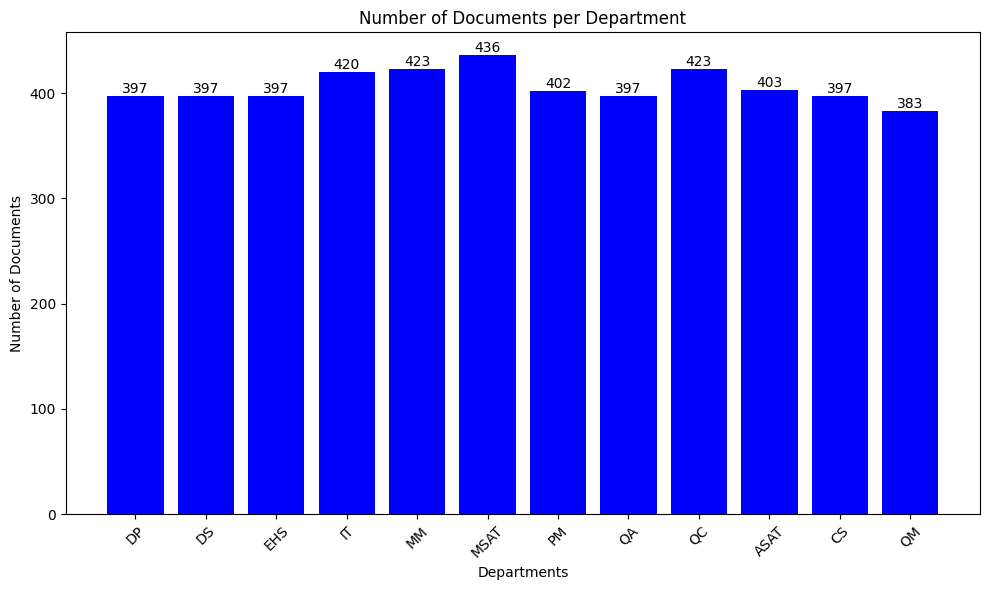

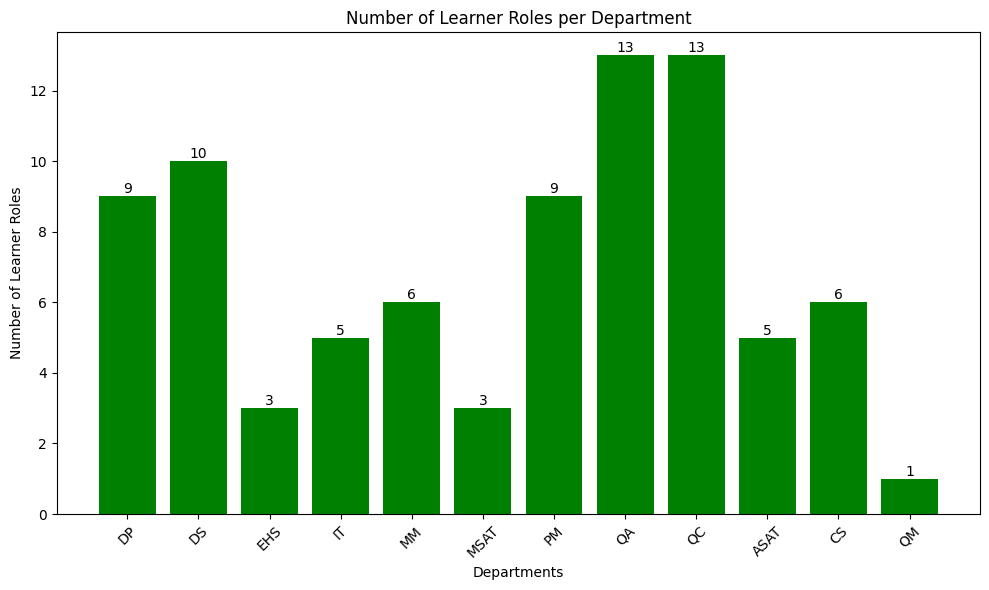

In [45]:
plt.figure(figsize=(10, 6))
departments = ['DP', 'DS', 'EHS', 'IT', 'MM', 'MSAT', 'PM', 'QA', 'QC', 'ASAT', 'CS', 'QM']
doc_counts = [DP_row_number, DS_row_number, EHS_row_number, IT_row_number, MM_row_number, MSAT_row_number, PM_row_number, QA_row_number, QC_row_number, ASAT_row_number, CS_row_number, QM_row_number]
bars = plt.bar(departments, doc_counts, color='blue')
plt.xlabel('Departments')
plt.ylabel('Number of Documents')
plt.title('Number of Documents per Department')
plt.xticks(rotation=45)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

Learner_Roles = {
    'DP': DP_col_number,
    'DS': DS_col_number,
    'EHS': EHS_col_number,
    'IT': IT_col_number,
    'MM': MM_col_number,
    'MSAT': MSAT_col_number,
    'PM': PM_col_number,
    'QA': QA_col_number,
    'QC': QC_col_number,
    'ASAT': ASAT_col_number,
    'CS': CS_col_number,
    'QM': QM_col_number
}



plt.figure(figsize=(10, 6))
bars2 = plt.bar(Learner_Roles.keys(), Learner_Roles.values(), color='green')
plt.xlabel('Departments')
plt.ylabel('Number of Learner Roles')
plt.title('Number of Learner Roles per Department')
plt.xticks(rotation=45)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom')
plt.tight_layout()
plt.show()